<h1><font color="black">Bonus Project</font></h1>

<h4><font color="red">Note: All units are in base form of metric units. (e.g. meters, Kilograms, seconds)</font></h4>

In [10]:
from vpython import* 
import numpy as np
import timeit
import matplotlib.pyplot as plt

<h2><font color="black">Molecular Dynamics</font></h2>

In [11]:
scene = canvas()

<IPython.core.display.Javascript object>

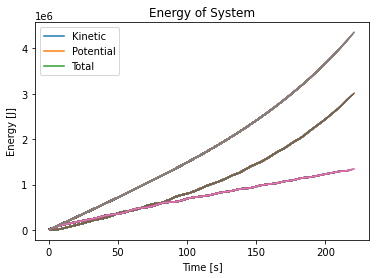

In [12]:
# Initializing N (the dimensions of the NxNxN "crystal lattice")
N = 2
# Initializing mass and spring constant
mass = 1
k = 1
# Diameter is initialized to 2 and the spacing is double that, this will allow room for "springs"
diameter = 2
spacing = 20
# A dictionary is used to hold our water objects, create a box
water = {}
wallR = box(pos=vector(45,0,0), size=vector(0.2,90,90), color=color.white)
wallL = box(pos=vector(-45,0,0), size=vector(0.2,90,90), color=color.white)
wallU = box(pos=vector(0,45,0), size=vector(90,0.2,90), color=color.white)
wallD = box(pos=vector(0,-45,0), size=vector(90,0.2,90), color=color.white)
wallB = box(pos=vector(0,0,-45), size=vector(90,90,0.2), color=color.white)
# Initialize time and time step
t = 0
dt = 0.1
# Initialize energy variables
PE = 0
KE = 0
TE = 0
# Initialize arrays
time = []
kinetic = []
potential = []
total = []
# Center on the middle sphere in the lattice with a scaled adjustment
scene.center = 0.5*(N-1)*vector(1,1,1)
# Initialize variables for calculating average time for respective method
avg = 0
count = 0

# Creating an NxNxN matrix of spheres, the range was modified in order to make calling of the sphere objects more intuitive
for x in range (1, N+1):
    for y in range (1, N+1):
        for z in range (1, N+1):
            velocity = vector(x, y, z)
            hydrogen1 =  sphere(pos = vector(x*(spacing+2), y*spacing, z*spacing), velocity = vector(0,0,0), mass = mass, radius = diameter/2, visible = True, color = color.red)
            hydrogen2 =  sphere(pos = vector(x*(spacing-2), y*spacing, z*spacing), velocity = vector(0,0,0), mass = mass, radius = diameter/2, visible = True, color = color.red)
            oxygen =  sphere(pos = vector(x*spacing, y*(spacing+2), z*spacing), velocity = vector(0,0,0), mass = mass, radius = diameter, visible = True, color = color.blue)
            water[(x, y, z)] = compound([hydrogen1, hydrogen2, oxygen], pos = vector(x*spacing, y*spacing, z*spacing), velocity = velocity.random())
    
# Here we check that all velocities are initialized at random from to hold a value between -1 to 1
# for x in range (1, N+1):
#     for y in range (1, N+1):
#         for z in range (1, N+1):
#             check = water[(x, y, z)].velocity
#             print(check)
            
while t < 220:
    rate(80)
    temp = water[(1,1,1)]
    # Here we utilize the explicit/forward euler integration method
    for x in range (1, N+1):
        for y in range (1, N+1):
            for z in range (1, N+1):
                
                # Index objects
                w = water[(x, y, z)]
                    
                # Update acceleration, velocity, and position. We subtract a vector for better visualization of the change in energy
                a = (-k*w.pos)/mass
                w.velocity += a * dt
                starttime = timeit.default_timer()
                #print("The start time is :",starttime)
                w.pos +=  w.velocity*dt
                #print("The time difference for the Forward EUler is :", timeit.default_timer() - starttime)
                tempavg = timeit.default_timer() - starttime
                avg += tempavg
                
                # Handle molecular collisions
                if (temp.pos == w.pos):
                    w.pos = -w.pos
                
                # Handle wall collisions
                if w.pos.x > wallR.pos.x - 8:
                    w.velocity.x = -w.velocity.x
                elif w.pos.x < wallL.pos.x + 8:
                    w.velocity.x = -w.velocity.x
                elif w.pos.y > wallU.pos.y - 8:
                    w.velocity.y = -w.velocity.y
                elif w.pos.y < wallD.pos.y + 8:
                    w.velocity.y = -w.velocity.y
                elif w.pos.z > -wallB.pos.z - 8:    
                    w.velocity.z = -w.velocity.z
                elif w.pos.z < wallB.pos.z + 8:
                    w.velocity.z = -w.velocity.z
                    
                temp = w
                
                # Kinetic and Potential energy calculations
                tempKE = (mass/2)*(pow(w.velocity.x,2)+pow(w.velocity.y,2)+pow(w.velocity.z,2))
                tempPE = (k/2)*(pow(w.pos.x,2)+pow(w.pos.y,2)+pow(w.pos.z,2))
                tempTE = tempKE + tempPE
                KE += tempKE
                PE += tempPE
                TE = KE + PE
                t += dt
                count += 1
            
    average = avg / count
    #print("Time average time for Forward Euler is: ", average)
    # Append values to list, since we are outside the for loops we get the energy of the system
    time.append(t)
    kinetic.append(KE)
    potential.append(PE)
    total.append(TE)
    
    # Plot the energy of the system
    plt.plot(time, kinetic)
    plt.plot(time, potential)
    plt.plot(time, total)
    plt.title('Energy of System')
    plt.xlabel('Time [s]')
    plt.ylabel('Energy [J]')
    plt.legend(['Kinetic', 'Potential', 'Total'])

<h2><font color="black">Analysis</font></h2>

<h4><font color="black">A 2x2x2 lattice of water molecules was created using the compound object. We make a water compound using two hydrogen spheres and one oxygen sphere. A box object is used as a periodic boundary condition. Interactions between the boundary and molecules are taken care of with decision statements. Wikipedia was used to look up Lennard Jones and electrostatic 
forces. </font></h4>